<a href="https://colab.research.google.com/github/ravigautam7739/Book-Recommendation-System-Capstone-Project/blob/main/Book_Recommendation_System_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Book Recommendation System**    





##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name**            - RaviRanjan Kumar


# **Project Summary -**

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective of this project is to create a collaborative book recommendation system for users.

# **GitHub Link -** [link to project](https://github.com/ravigautam7739/Book-Recommendation-System-Capstone-Project/blob/834fbc1b357f2166aa81fdfdad60b32bd35415eb/Book_Recommendation_System_Capstone_Project.ipynb)


# **Problem Statement**


Developing an effective book recommendation system that provides popular books by ratings and personalized books recommendations to users based on similar users books ratings(collaborative filtering), this should increase book discovery and improve overall user satisfaction in the context of online book store platforms

**Business Objective**


To leverage the insights gained from both collaborative-based and popularity-based filtering approaches to develop a comprehensive book recommendation system. The primary goal is to enhance user satisfaction and increase book discovery by providing personalized recommendations based on users' preferences and popular trends. This approach aims to optimize user engagement and retention on the online book platform, thereby fostering a thriving community of readers and maximizing the platform's revenue potential through increased book sales and user interactions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import warnings; warnings.simplefilter('ignore')
from scipy.stats import pearsonr

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
# Load Dataset
import pandas as pd
books = pd.read_csv('/content/drive/MyDrive/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Ratings.csv')

### Dataset First View

In [ ]:
# Dataset First Look
print('books data frame')
books.head(5)

books data frame


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
print('users data frame')
users.head(5)

users data frame


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
print('ratings data frame')
ratings.head(5)

ratings data frame


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print('books dataset shape-', books.shape)

print('users dataset shape-', users.shape)

print('ratings dataset shape-', ratings.shape)

books dataset shape- (271360, 8)
users dataset shape- (278858, 3)
ratings dataset shape- (1149780, 3)


### Dataset Information

In [ ]:
# Dataset Info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [ ]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print('books dataset duplicate values-',books.duplicated().sum())

print('users dataset duplicate values-',users.duplicated().sum())

print('ratings dataset duplicate values-',ratings.duplicated().sum())

books dataset duplicate values- 0
users dataset duplicate values- 0
ratings dataset duplicate values- 0


#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print('books dataset null values-',books.isnull().sum())

books dataset null values- ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [ ]:
print('users dataset null values-',users.isnull().sum())

users dataset null values- User-ID          0
Location         0
Age         110762
dtype: int64


In [ ]:
print('ratings dataset null values-',ratings.isnull().sum())

ratings dataset null values- User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


#### Visualizing the missing values, since age in users df has most missing values visualizing by pie chart

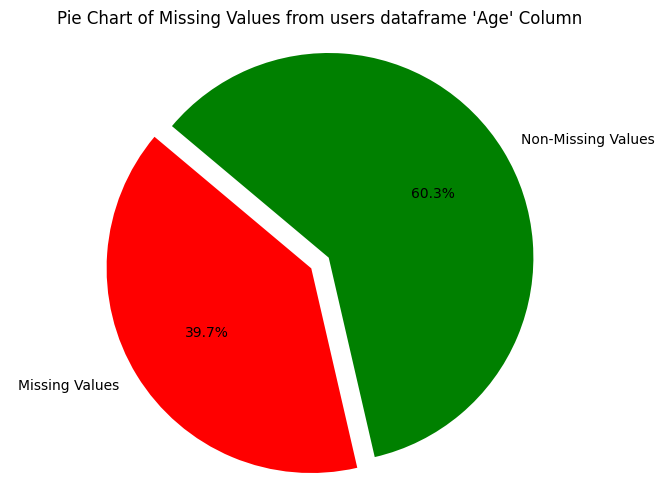

In [ ]:
# Visualizing the missing values, since age in users df has most missing values visualizing by pie chart

# Calculate the number of missing values in the 'Age' column
missing_values_count = users['Age'].isnull().sum()

# Calculate the number of non-missing values in the 'Age' column
total_values_count = len(users['Age']) - missing_values_count

# Creating a pie chart to visualize missing values
labels = ['Missing Values', 'Non-Missing Values']
sizes = [missing_values_count, total_values_count]
colors = ['red', 'green']
explode = (0.1, 0)  # explode the 1st slice (Missing Values)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("Pie Chart of Missing Values from users dataframe 'Age' Column")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### What did you know about your dataset?



**Duplicate values-** neither of dataframe has duplicate values, that's very good

**missing values-**

**- books dataframe** has 2 missing values in publishers and 1 missing value in author

**- users dataframe** has 1,10,762 missing values in age.

**- ratings dataframe** has no missing values

## ***2. Understanding Your Variables***

### **Data info**

In [ ]:
# Dataset Columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

In [ ]:
users.columns

Index(['User-ID', 'Location', 'Age'], dtype='object')

In [ ]:
# Dataset Describe
books.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [ ]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [ ]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


### Variables Description

**Books dataset-**

- ISBN - International Book Standard Number
- Book Title - Contains title of book
- Book Author - Contains author of the book
- Year of Publication - Contains year the book was published
- Publisher - Name of Publisher released the book
- Image URL S - small image URL
- Image URL M - medium image URL
- Image URL L - Large image URL

**Users dataset-**
- User ID - Unique ID to each user logined to website
- Location - Location of the user
- Age - age of the user

**Ratings dataset-**
- User ID - Unique ID to each user logined to website
- ISBN - International Book Standard Number
- Book Rating - Users rating for books

### Check Unique Values for each variable.

In [ ]:
#Unique Values for each Authors.
books['Book-Author'].unique()

array(['Mark P. O. Morford', 'Richard Bruce Wright', "Carlo D'Este", ...,
       'David Biggs', 'Teri Sloat', 'Christopher  Biffle'], dtype=object)

In [ ]:
#Unique Values for each publications.
books['Publisher'].unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

## **3.** ***Data Wrangling***

### Data Wrangling Code

In [ ]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
#removing null values from books dataset book-author and publisher
books.dropna(subset= ['Book-Author','Publisher'], inplace = True)

### What all manipulations have you done and insights you found?

**Handling missing values-**

**- books dataframe** has 2 missing values in publishers and 1 missing value in author, remove those null values from books dataset

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1   Top 10 Author's written most number of books**


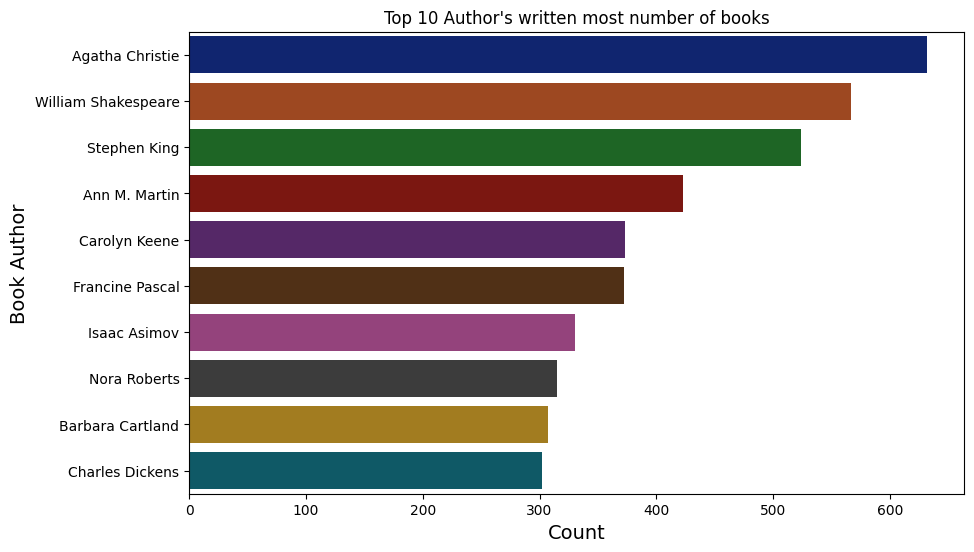

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,6))
ax=sns.countplot(y='Book-Author',palette = 'dark', data = books, order = books['Book-Author'].value_counts().index[0:10])
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Book Author', fontsize=14)
plt.title("Top 10 Author's written most number of books")
plt.show()

##### 1. Why did you pick the specific chart?

**counter plot:** A counter plot is also known as countplot, is used to visualize the frequency or count of categorical data, it displays the the number of occureneces of each author within Book-Author variable.

##### 2. What is/are the insight(s) found from the chart?

- Highest number of books written by Agatha Christie with 632
- Second highest number of books written by William Shakespeare with 567, follwed by third highest Stephen King 524

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive -** categorising books by Authors who has written more number of books and their books were less sold or less famous Authors who has written less books and more famous, this information helps in managing quantity of books to be stocked at warehouse.

#### **Chart - 2 Top 10 publishers with most books published**

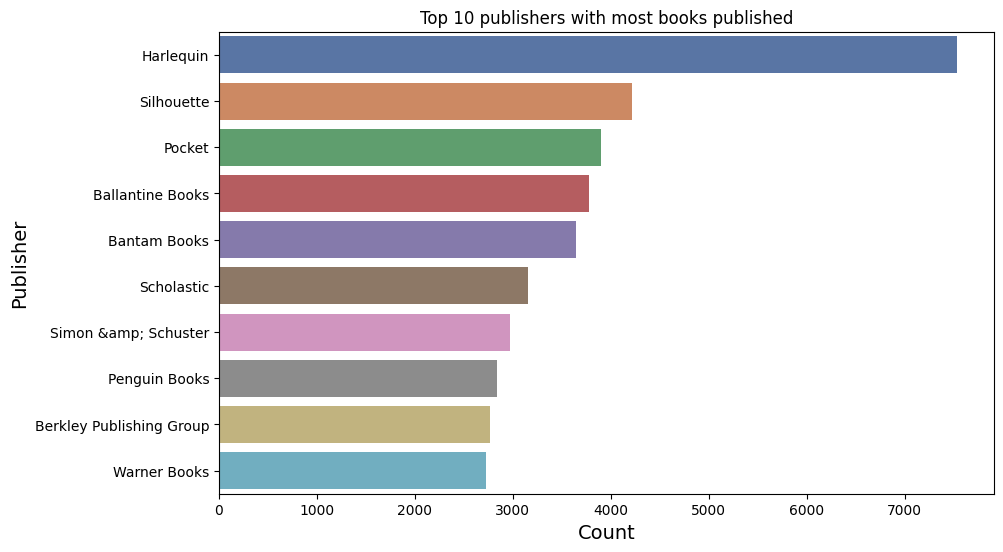

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,6))
ax=sns.countplot(y='Publisher', palette = 'deep',data = books, order = books['Publisher'].value_counts().index[0:10])
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Publisher', fontsize=14)
plt.title('Top 10 publishers with most books published')
plt.show()

##### 1. Why did you pick the specific chart?

**counter plot:** A counter plot is also known as countplot, is used to visualize the frequency or count of categorical data, it displays the the number of occureneces of each Publisher within Publisher variable.

##### 2. What is/are the insight(s) found from the chart?

- 'Harlequin' publisher are at highest number of publications with 7535, followed by 'Sihouette' with 4220 publications.
- There other popular publications in top 10 publishers like Penguin books and warner books who has less publications but they are know for very popular books.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive-**
Unserstanding Publishers who has more number of books published and more popular books published, helps in predicting when a book is released by any publication whether it will get popular or not, this also helps in maintaining inventory of books

#### **Chart - 3 Top 20 Years with highest books published**

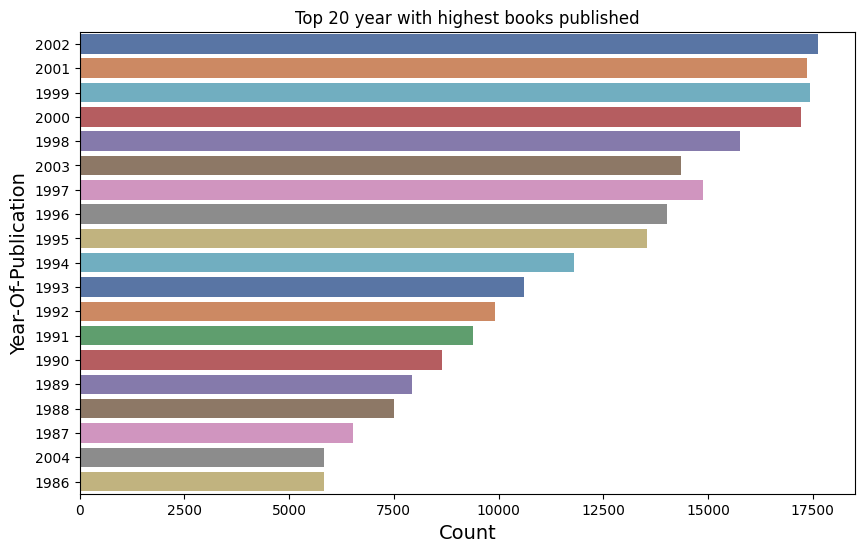

In [ ]:
# Chart -  visualization code
plt.figure(figsize=(10,6))
ax=sns.countplot(y='Year-Of-Publication', palette = 'deep',data = books, order = books['Year-Of-Publication'].value_counts().index[0:20])
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Year-Of-Publication', fontsize=14)
plt.title('Top 20 year with highest books published')
plt.show()

##### 1. Why did you pick the specific chart?

**counter plot:** A counter plot is also known as countplot, is used to visualize the frequency or count of categorical data, it displays the the number of occureneces of each year within year_of_publication variable.

##### 2. What is/are the insight(s) found from the chart?

- Its an amazing visualization, it clearly shows the era of books being publishing significantly increasing, it shows how authors are expressing their thoughts and experiences via books.

**observations-** in year 1986, 4017 books were published and in year 2002, 13906 books were released with overall growth of 246% in books published per year

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive-** 246% of overall growth of books published from 1986-2002 shows there is good future in books selling bussiness

#### **Chart - 4 Top 10 books with highest count of ratings given by users**

In [ ]:
#merging books and ratings table
books_ratings = pd.merge(ratings,books, on = 'ISBN')
books_ratings.shape

(1031132, 10)

- books_ratings is a new table created by merging books and ratings tables on 'ISBN' column

- In ratings table 'Book-Rating' columns has rating '0' which means users has not given any rating to a specific book, removing books with '0' Book-Rating gives a proper count of actually rated books over non-rated books

In [ ]:
#books_with_ratings table with ratings given by users
books_with_ratings = books_ratings[books_ratings['Book-Rating'] >0]
books_with_ratings.shape

(383838, 10)

Text(0.5, 1.0, 'Top 10 books with highest count of ratings given by users')

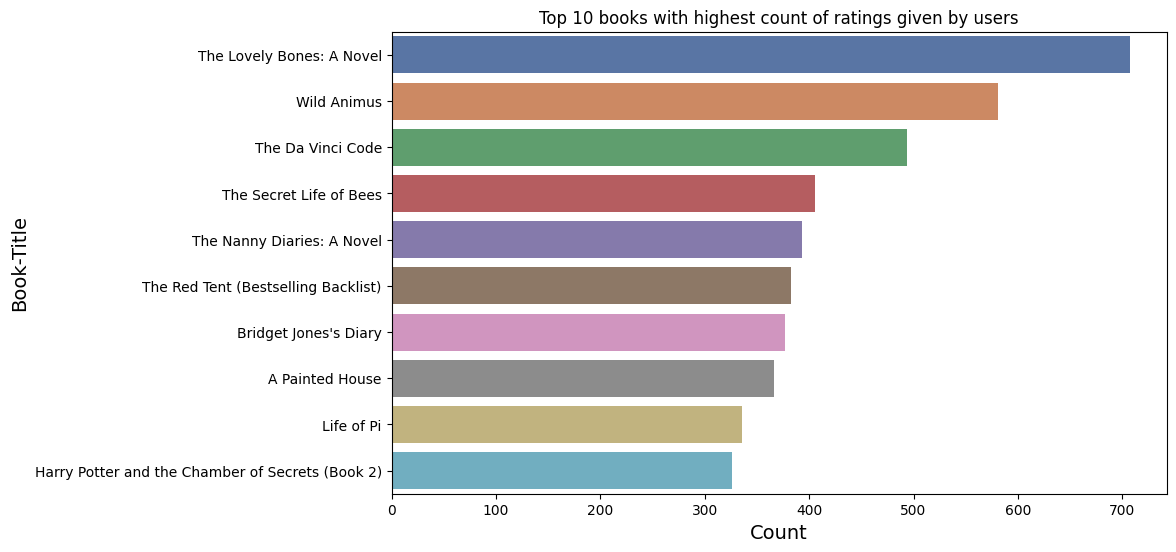

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
ax=sns.countplot(y='Book-Title', palette = 'deep',data = books_with_ratings, order = books_with_ratings['Book-Title'].value_counts().index[0:10])
ax.set_xlabel('Count', fontsize=14)
ax.set_ylabel('Book-Title', fontsize=14)
plt.title('Top 10 books with highest count of ratings given by users')

- Highest count of ratings were given to **The Lovely Bones: A Novel** with 707 users, followed by **Wild Animus** with 581 user rating count.

##### 1. Why did you pick the specific chart?

**counter plot:** A counter plot is also known as countplot, is used to visualize the frequency or count of categorical data, it displays the the number of occureneces of each book within Book_title variable.

##### 2. What is/are the insight(s) found from the chart?

- Highest count of ratings were given to **The Lovely Bones: A Novel** with 707 users, followed by **Wild Animus** with 581 user rating count.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Identifying popular book - helps in identifying which books are generating the most interest and engament among readers.
- optimising marketing strategies - knowing which books are highly rated and popular can be used for popular book recommendations for new users

#### **Chart - 5 Ratings value counts**

In [ ]:
#creating a table with 'Book-ratings' with value counts i,e what rating was given to most of books by users
ratings_value_counts = books_with_ratings['Book-Rating'].value_counts().reset_index()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

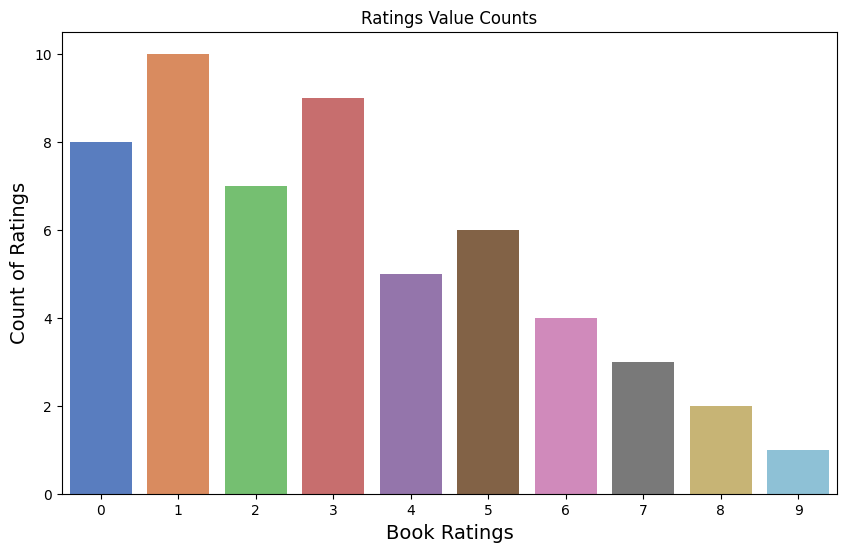

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax = sns.barplot(x=ratings_value_counts.index, y=ratings_value_counts['Book-Rating'], palette='muted')
ax.set_xlabel('Book Ratings', fontsize=14)
ax.set_ylabel('Count of Ratings', fontsize=14)
plt.title('Ratings Value Counts')
plt.show()


##### 1. Why did you pick the specific chart?

**Bar plot:** A bar plot is used to visualize the relationship between categorical variable and a numerical variable. Here rating_value is a categorical variable and count_of_rating is numerical variable

##### 2. What is/are the insight(s) found from the chart?

- Plot shows highest ratings given by user are 8,10,7 in descending order, majority of users prefer to give rating 8. Which says books were liked by users.
- rating from 1-4 has very less count which says users didn't like the book and gave less rating

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impacts:**

**- High Customer Engagement:** Having a range of ratings indicates that customers are actively engaging with the books and providing feedback, which can be valuable for the business to understand customer preferences and improve offerings**(personalised recommendations)**.

**- High Customer Satisfaction:** High ratings (8, 10, 7) suggest that a significant portion of customers are satisfied with the books, potentially leading to positive word-of-mouth recommendations and repeat business.

**Negative Impacts:**

**- Low Ratings Impact Sales:** Books with lower ratings (1-4) may suffer from decreased sales and lower customer retention rates. Negative reviews can deter potential customers from purchasing, leading to lost revenue opportunities.

**- Reputation Damage:** Consistently low ratings can damage the reputation of the business and the books themselves, leading to decreased trust among customers and stakeholders.

## ***5. Data Cleaning and Data Manipulation***

### 1-4. Data cleaning

**1. Handling missing values**
- Books table has 2 missing values in Publishers column and 1 missing value in author since this is very negligible count, droped those instances
- Users table has missing values in age column, since in book recommendation system our criteria is based on books rating we wont be considering age columns no manupulation is required.

**2. Handling Outliers -** Features used to for book recommendation has no outliers.

**3. Categorical encoding -** encoding is not required

**4. Textual Data Preprocessing -** Not required


### 5. Feature Manipulation & Selection

#### 1. Feature Manipulation

Dataset consists of 3 tables from books table and users table are being used for book recommendation system(recommending books by users ratings)

- books_ratings is a new table created by merging books and ratings tables on 'ISBN' column

**- In ratings table 'Book-Rating' columns has rating '0' which means users has not given any rating to a specific book at actual if rating is not given to any book by user it should be 'null', to tackle the issue keeping books with '0' ratings given doesn't add any value in book recommendation system, hence keep books only with ratings given.**


In [ ]:
#merging books and ratings table
books_ratings = pd.merge(ratings,books, on = 'ISBN')
print("shape of 'books ratings table' including books being rated and not rated by users-",books_ratings.shape)

#books_with_ratings table with ratings given by users
books_with_ratings = books_ratings[books_ratings['Book-Rating'] >0]
print("shape of 'books with ratings table' including only books that been rated by users-",books_with_ratings.shape)

shape of 'books ratings table' including books being rated and not rated by users- (1031132, 10)
shape of 'books with ratings table' including only books that been rated by users- (383838, 10)


#### 2. Feature Selection

##### Which all features you found important and why?



In [ ]:
books_with_ratings.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L'],
      dtype='object')

from 'books_with_ratings' table we will build collaborative recommendation system with 'user_id', 'Book_rating', 'Book_title'.

## ***6. ML Model Implementation***

### Collaborative based filtering Data Pre-processing

#### 1. User similarity by ratings

##### **1.1 From 'books_with_ratings' table lets check how many users have given rating to books**
**- Underlying assumption-** based on user similarities i,e. user based approach and item similarities i,e. item based approach

In [ ]:
'''from books_with_ratings grouping by user_id, aggregating count of Book-Rating
gives how many books were rated by each user
----------books_with_ratings = books_ratings[books_ratings['Book-Rating'] >0]  '''

user_ratings_count = books_with_ratings.groupby('User-ID').count()['Book-Rating'].reset_index()
user_ratings_count.rename(columns={'Book-Rating':'number_of_books_rated'},inplace = True)

In [ ]:
#shape of user_ratings_count
print("size of table for 'user rated atleast 1 book'-",user_ratings_count.shape)
print("size of table for 'book rated by atleast by 1 user'-",books_with_ratings.shape)

size of table for 'user rated atleast 1 book'- (68091, 2)
size of table for 'book rated by atleast by 1 user'- (383838, 10)


##### **1.2 Lets visualize a distribution plot where users are divided into bins ranging from 0-500 based on number of ratings given to books**

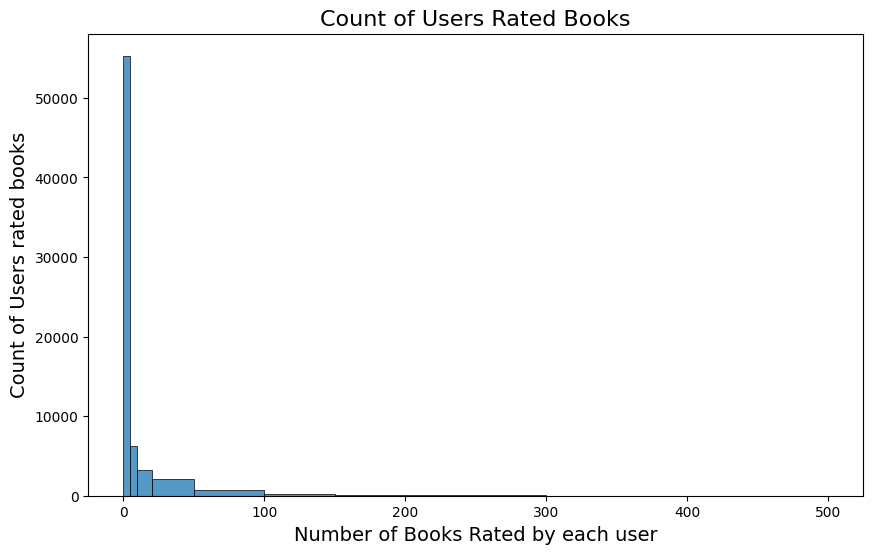

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(user_ratings_count['number_of_books_rated'], bins=[0, 5, 10, 20, 50, 100, 150, 200, 300, 400, 500], kde=False)
ax.set_xlabel('Number of Books Rated by each user', fontsize=14)
ax.set_ylabel('Count of Users rated books', fontsize=14)
plt.title("Count of Users Rated Books", fontsize=16)
plt.show()


**Insights from distribution plot-**

- Plot shows there are very high group of users that has given ratings to less than 10 books, this shows that lot of people read only less than 10 books

##### **1.3 To understand users based on range of books they have rated from 1-5,5-10 and so on**

In [ ]:
# Initialize lists to store counts for each range
counts = [0] * 8

# Defining the ranges
ranges = [(1, 5), (6, 10), (11, 15), (16, 20), (21, 30), (31, 40), (41, 50), (51, float('inf'))]

# Loop through the number of books rated by each user
for i in user_ratings_count['number_of_books_rated']:
    for idx, (start, end) in enumerate(ranges):
        if start <= i <= end:
            counts[idx] += 1
            break

# Create a DataFrame to store the results
data = {'Range_of_users': [f'{start}-{end}' if end != float('inf') else f'{start}+' for start, end in ranges],
        'no_of_ratings_given': counts}

user_ratings_count_range = pd.DataFrame(data)
user_ratings_count_range

,Range_of_users,no_of_ratings_given
0,1-5,57307
1,6-10,4803
2,11-15,1808
3,16-20,1035
4,21-30,1071
5,31-40,556
6,41-50,361
7,51+,1150


In [ ]:
#reconfirming that users rated more than 50 books are 1150 users
user_ratings_count[user_ratings_count['number_of_books_rated']>50].shape

(1150, 2)

**-Observations from user_ratings_count_range table**

**from distribution plot we couldn't understand clearly, but in dataframe we could clearly see, user falling rannge by number books being rated**

- 57,307 users has rated only 5 books.
- only 1150 users has rated more than 50 books, this shows that these group of users are really book lovers and these group help alot in book recommendation system



##### **1.4 Considering users rated atleast 50 books for recommendations system-**

**- Data Richness:** Users who have rated a large number of books provide a richer dataset for the recommendation system to analyze. With more ratings from a user, the system has a better understanding of their preferences, tastes, and interests, which can lead to more accurate recommendations.

**Better Understanding of User Preferences:** Users who have rated a significant number of books help the recommendation system to better understand their preferences. This can lead to more personalized recommendations tailored to the individual user's likes and dislikes.

**Improved Quality of Recommendations:** Users who have rated a large number of books provide more reliable signals about their preferences, leading to higher-quality recommendations. These users have demonstrated a strong engagement with the platform and are likely to provide valuable feedback on the recommendations they receive, further improving the system's performance over time.



In [ ]:
#filerring table with users rated more than 50 books only
user_rated_greaterthan_50books =user_ratings_count[user_ratings_count['number_of_books_rated']>50]
user_rated_greaterthan_50books

,User-ID,number_of_books_rated
64,254,57
146,638,54
345,1424,67
416,1733,91
454,1903,53
...,...,...
67533,276680,90
67697,277427,146
67902,278137,53
67920,278188,52


#### 2. Books similarity by ratings

##### **2.1 Filtering books from 'books_with_ratings' where users rated greaterthan 50 books**

In [ ]:
#filtering books from 'books with rating' table with 'user_rated_greaterthan_50books
filtered_user_rated_greaterthan_50books = books_with_ratings[books_with_ratings['User-ID'].isin(user_rated_greaterthan_50books['User-ID'])]
print('size of data after filtering users who has given 50+ ratings',filtered_user_rated_greaterthan_50books.shape)

size of data after filtering users who has given 50+ ratings (151921, 10)


In [ ]:
'''from 'filtered_user_rated_greaterthan_50books' grouping by 'Book-Title' aggregating count of books_Rating
gives how many ratings were given for each book '''
filtered_book_ratings_count = filtered_user_rated_greaterthan_50books.groupby('Book-Title').count()['Book-Rating'].reset_index()
filtered_book_ratings_count.rename(columns={'Book-Rating':'number_of_ratings_given_to_book'},inplace = True)
print('size of filtered_book_ratings_count-',filtered_book_ratings_count.shape)

size of filtered_book_ratings_count- (79044, 2)


##### **2.2 Lets visualize distribution plot of books by count of ratings given**

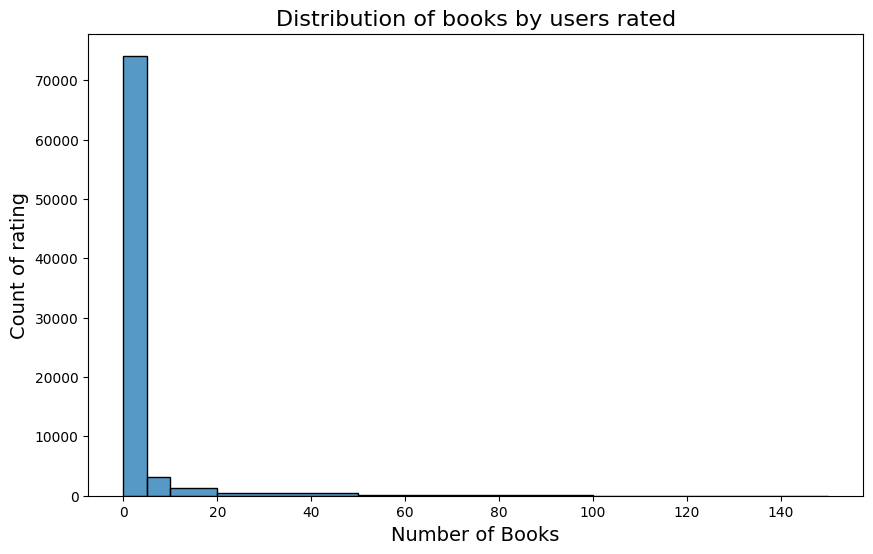

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(filtered_book_ratings_count['number_of_ratings_given_to_book'], bins=[0, 5, 10, 20, 50, 100, 150], kde=False)
ax.set_xlabel('Number of Books', fontsize=14)
ax.set_ylabel('Count of rating', fontsize=14)
plt.title("Distribution of books by users rated", fontsize=16)
plt.show()


**Insights from distribution plot-**

- Plot shows there are many books that have very less number of ratings, less than 10

##### **2.3 To understand books based on range of ratings given by users from 1-5,5-10 and so on**

In [ ]:
# Initialize lists to store counts for each range
counts = [0] * 8

# Defining the ranges
ranges = [(1, 5), (6, 10), (11, 15), (16, 20), (21, 30), (31, 40), (41, 50), (51, float('inf'))]

# Loop through the number of ratings given for each book
for i in filtered_book_ratings_count['number_of_ratings_given_to_book']:
    for idx, (start, end) in enumerate(ranges):
        if start <= i <= end:
            counts[idx] += 1
            break

# Create a DataFrame to store the results
data1 = {'range_of_ratings': [f'{start}-{end}' if end != float('inf') else f'{start}+' for start, end in ranges],
        'no_of_books': counts}

book_ratings_count_range = pd.DataFrame(data1)
book_ratings_count_range

,range_of_ratings,no_of_books
0,1-5,75323
1,6-10,2263
2,11-15,724
3,16-20,293
4,21-30,232
5,31-40,96
6,41-50,54
7,51+,59


In [ ]:
#reconfirming that book with 50+ number of ratings
filtered_book_ratings_count[filtered_book_ratings_count['number_of_ratings_given_to_book']>15].shape

(734, 2)

**-Observations from book_ratings_count_range table**

**from distribution plot we couldn't understand clearly, but in dataframe we could clearly see, books falling in rannge by number of ratings given**

- Books with number of ratings 1-5 are about 75324 in count
- Books with 15+ number of ratings 724 in count

##### **2.4 Considering Books with 15+ number of ratings and 50+ rated users combination for recommendation system**

- Choosing books that has rated by 15+ users in book recommendation system could be a reasonable choice, as it offers a balance between user engagement, range coverage, and data density.

**- Rich Data:** Books with a large number of ratings provide a wealth of data for the recommendation system to analyze. With a diverse set of preferences and interests reflected in their ratings.


In [ ]:
Books_with_greaterthan_50ratings = filtered_book_ratings_count[filtered_book_ratings_count['number_of_ratings_given_to_book']>15]
Books_with_greaterthan_50ratings.head()

,Book-Title,number_of_ratings_given_to_book
248,1984,42
264,1st to Die: A Novel,69
310,2010: Odyssey Two,16
345,2nd Chance,57
514,84 Charing Cross Road,26


#### 3. Famous books (final table)

##### Famous_books table is a combination of 50+ users rated table filtered from 15+ rated books table, this combination of users and books gives a precise recommendation system
- with this combination we got data of 20,770 rows

In [ ]:
famous_books = filtered_user_rated_greaterthan_50books[filtered_user_rated_greaterthan_50books['Book-Title'].isin(Books_with_greaterthan_50ratings['Book-Title'])]
famous_books.shape

(20770, 10)

In [ ]:
famous_books.duplicated().sum()

0

- converting data frame to pivot table where index will be 'book title', columns will be 'user_id' and values will be 'book_ratings'

In [ ]:
famous_books_pt = famous_books.pivot_table(index='Book-Title', columns='User-ID',values='Book-Rating' )
famous_books_pt.head(5)

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,274004,274061,274111,274301,275970,276680,277427,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,9.0,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
'''majority of cells are null because the user has not rated book,
where ever a user rated book it is filled with a value
replacing null values with 0'''
famous_books_pt.fillna(0,inplace=True)
famous_books_pt.shape

(734, 1111)

### ML Model - 1 Cosine similarity

#### **Applying cosine similarity to famous books pivot table**

**Book recommendation by cosine similarity**

- Each book represents as a vector based on user ratings(famous_books_pt)
- cosine similarity calculates the cosine of the angles between two vectors
- recommendation process - computes cosine similarity between the target book and all others similar books
- this method doesn't affected by vector magnitudes for finding similar items based on user ratings

In [ ]:
similarity_scores = cosine_similarity(famous_books_pt)
similarity_scores.shape

(734, 734)

(734,734) shows that each book has formed cosine similarity with all other books including itself

In [ ]:
#creating a collaborative recommendation system

cosin_similarity_scores = cosine_similarity(famous_books_pt)

def recommendation_cosine(book_name):
  #fetch book index
  index = np.where(famous_books_pt.index==book_name)[0][0]
  #finds similarity scores
  similar_books = sorted(list(enumerate(cosin_similarity_scores[index])),key=lambda x:x[1], reverse = True)[1:6]

  for i in similar_books:
    print(famous_books_pt.index[i[0]])

**Explanation of Function - 'recommendation_cosine'**

**- Input:** function takes a book name as input

**- Fetch index:** finds the index of given book in the pivot table

**- Calculate cosine similarity:** retrives precomputed cosine similarity scores for the book

**- Sort and select:** sorts the similarity scores and selects the top similar books

**- print function:** prints the recommended books based on cosine similarity

In [ ]:
recommendation_cosine('Message in a Bottle')

A Walk to Remember
Nights in Rodanthe
The Mulberry Tree
The Rescue
The Notebook


In [ ]:
recommendation_cosine('The Rescue')

A Walk to Remember
The Notebook
The Guardian
Nights in Rodanthe
Key of Valor (Roberts, Nora. Key Trilogy, 3.)


In [ ]:
recommendation_cosine('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)


### ML Model - 2 Pearson correlation co-efiicient

#### **Applying Pearson correlation to famous books pivot table**

**Book recommendation by Pearson correlation**

**-Correlation calculation:** Pearson correlation measures the linear relationship between two variables

**- correlation range:** The correlation coefficient ranges from -1 to 1, where:
- 1 indicates a perfect positive linear relationship,
- -1 indicates a perfect negative linear relationship,
- 0 indicates no linear relationship.

**- Strength and Direction:** The sign (+/-) indicates the direction (positive/negative) of the relationship, and the magnitude represents the strength.

**- Recommendation Process:** Computes Pearson correlation between the target book and all others to recommend similar books.

In [ ]:
# Calculate Pearson correlation scores
pearson_correlation_scores = np.corrcoef(famous_books_pt.fillna(0))

# Function to recommend books based on Pearson correlation
def recommendation_pearson(book_name):
    # Check if the book exists in the dataset
    if book_name not in famous_books_pt.index:
        print("Book not found/please check the spelling.")
        return

    # Fetch book index
    index = np.where(famous_books_pt.index == book_name)[0][0]

    # Calculate Pearson correlation scores for the given book
    book_correlation = pearson_correlation_scores[index]

    # Sort similar books based on Pearson correlation scores
    similar_books = sorted(list(enumerate(book_correlation)), key=lambda x: x[1], reverse=True)[1:6]

    # Print recommended books
    for i, (similar_book_index, correlation_score) in enumerate(similar_books):
        print(f"Recommendation {i+1}: {famous_books_pt.index[similar_book_index]} (Correlation Score: {correlation_score})")

**Explanation of Function - 'recommendation_pearson'**

**- Input:** function takes a book name as input

**- Fetch index:** finds the index of given book in the pivot table

**- Calculate correlation scores:** retrives precomputed pearson correlation scores for the book

**- Sort and select:** sorts the correlated scores and selects the top similar books

**- print function:** prints the recommended books based on pearson correlation scores

In [ ]:
recommendation_pearson('Message in a Bottle')

Recommendation 1: Nights in Rodanthe (Correlation Score: 0.28368496597473275)
Recommendation 2: A Walk to Remember (Correlation Score: 0.28117280353488106)
Recommendation 3: The Mulberry Tree (Correlation Score: 0.20578576583125105)
Recommendation 4: The Rescue (Correlation Score: 0.19915369020349194)
Recommendation 5: Sanctuary (Correlation Score: 0.19559942800279295)


In [ ]:
recommendation_pearson('The Rescue')

Recommendation 1: A Walk to Remember (Correlation Score: 0.44121661153172137)
Recommendation 2: The Guardian (Correlation Score: 0.25851230173784095)
Recommendation 3: The Notebook (Correlation Score: 0.2582265971390848)
Recommendation 4: Nights in Rodanthe (Correlation Score: 0.23896029528919652)
Recommendation 5: Key of Valor (Roberts, Nora. Key Trilogy, 3.) (Correlation Score: 0.22329975415824435)


In [ ]:
recommendation_pearson('Harry Potter and the Chamber of Secrets (Book 2)')

Recommendation 1: Harry Potter and the Prisoner of Azkaban (Book 3) (Correlation Score: 0.5997947719721466)
Recommendation 2: Harry Potter and the Goblet of Fire (Book 4) (Correlation Score: 0.5909597702425802)
Recommendation 3: Harry Potter and the Sorcerer's Stone (Book 1) (Correlation Score: 0.4574663228584531)
Recommendation 4: Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)) (Correlation Score: 0.3827330170453809)
Recommendation 5: Harry Potter and the Order of the Phoenix (Book 5) (Correlation Score: 0.3404291852674784)


### ML Model - 3 Nearest Neighbors Algorithm (Cosine Similarity)

#### **Applying Cosine similarity to Nearest Neighbors Algorithm**

**Book recommendation by Nearest Neighbors Algorithm**

**- Model fitting:** Nearest neighbors model is fitted with cosine similarity metric.

**- Nearest neighbor search:** for given target book, the model searches for the k-nearest neighbor's based on cosine similarity

**- Distance calculation:** It calculates distances between tha target book and all other books in the dataset

**- K-Nearest Neighbor Selection:** Selects the k-nearest neighbors with the smallest distances (highest similarities) to the target book.

**- Recommendation Process:** Recommends books that are most similar to the target book based on cosine similarity.

In [ ]:
# Fit nearest neighbors model
nn_model_cosine = NearestNeighbors(metric='cosine')
nn_model_cosine.fit(famous_books_pt)

def recommendation_nearest_neighbor_cosine(book_name):
    try:
        # Fetch book index
        index = famous_books_pt.index.get_loc(book_name)

        # Find nearest neighbors based on cosine similarity
        distances, indices = nn_model_cosine.kneighbors([famous_books_pt.iloc[index]], n_neighbors=6)

        for idx in indices[0][1:]:
            print(famous_books_pt.index[idx])
    except KeyError:
        print("Book not found/Please check the spelling.")

**Explanation of Function - 'recommendation_nearest_neighbor_cosine'**

**- Input:** function takes a book name as input

**- Fetch index:** finds the index of given book in the pivot table

**- Find Nearest Neighbors:** Utilizes the fitted Nearest Neighbors model to find the k-nearest neighbors based on cosine similarity.

**- print function:** prints the recommended books, excluding the target book itself

In [ ]:
recommendation_nearest_neighbor_cosine('Message in a Bottle')

A Walk to Remember
Nights in Rodanthe
The Mulberry Tree
The Rescue
The Notebook


In [ ]:
recommendation_nearest_neighbor_cosine('The Rescue')

A Walk to Remember
The Notebook
The Guardian
Nights in Rodanthe
Key of Valor (Roberts, Nora. Key Trilogy, 3.)


In [ ]:
recommendation_nearest_neighbor_cosine('Harry Potter and the Chamber of Secrets (Book 2)')

Harry Potter and the Prisoner of Azkaban (Book 3)
Harry Potter and the Goblet of Fire (Book 4)
Harry Potter and the Sorcerer's Stone (Book 1)
Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))
Harry Potter and the Order of the Phoenix (Book 5)


### Which Evaluation metrics did you consider for a positive business impact and why?

The Goal of project was to predict books to recommend for users, the absence of domain expertise in book recommendation is acknowledged. Unlike fields where specialized knowledge is essential, book preferences are subjective and diverse. The project prioritizes user feedback and iterative refinements to improve recommendation quality. By focusing on user satisfaction, the system aims to cater to a broad range of readers, irrespective of domain expertise.

**- Complexity of Domain:** the domain of book recommendation systems is complex and multifaceted. Books vary widely in terms of genre, style, audience preferences, and cultural significance. As a result, it may be challenging to define universal evaluation metrics that capture the nuances of book recommendations accurately.

**- Subjectivity of User Preferences:** Highlight that user preferences for books are highly subjective and vary from person to person. What one user considers a relevant and enjoyable recommendation may not be the same for another user. Therefore, relying solely on quantitative evaluation metrics may not fully capture the effectiveness of the recommendation system.

**- Domain Expertise and user Feedback:**
Importance of domain expertise in interpreting and evaluating book recommendations. Domain experts, such as librarians, literary critics, or avid readers, possess in-depth knowledge of books, genres, and literary trends. Their expertise can provide valuable insights into the quality and relevance of recommended books.
user feedback and qualitative assessments from domain experts can serve as alternative evaluation methods. Gathering feedback from users who have interacted with the recommendation system and consulting domain experts for their opinions on the recommended books can provide valuable qualitative insights into the system's performance.

**- Iterative Improvement Process:** The abscence of evaluation metrics in recommendation system is continually evolving based on user feedback, with more data such as books genres, publisher ratings, author ratings we can develop an algorithm & evaluation metrics.  such that any new book is written by an author and published by an publisher we can predict book rating aswell as sales of book

### Which ML model did you choose from the above created models as your final prediction model and why?

SInce there is no evaluation metric to finalise the algorithm/model

we can conclude based on books recommended by Cosine similarity and Pearson correlation, the recommendations were very close with change in order of recomendations:

**Case: 1 - Book name 'Message in a Bottle':**

**Case: 1 result - 4/5 books are similar recommended books, with change in order of books recommended**

**Case: 2 - Book name 'The Rescue':**

**Case: 2 result - 5/5 books are similar recommended books, with change in order of books recommended**

**Case: 3 - Book name 'Harry Potter and the Chamber of Secrets (Book 2)':**

**Case: 3 result - 5/5 books are similar recommended books including order of books recommended**


### Popularity Based recommendation system

**Purpose of Popularity-based Filtering:** While collaborative filtering leverages user engagement and personalized preferences to recommend books, it fails to provide suggestions to less interactive and new users, known as the 'Cold start' problem. To address this issue, popularity-based recommendation systems are introduced to offer initial recommendations and engage users by highlighting trending books.

**Approach:**
Recommending top 50 books based on high number of ratings received by users and high average rating, merging these two tables and sorting them to top 50

In [ ]:
#grouping by book title counting number of ratings given for each book
ratings_count = books_with_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
ratings_count.rename(columns = {'Book-Rating':'count_of_ratings_given'},inplace = True)
ratings_count.sort_values('count_of_ratings_given', ascending = False).head(5)

,Book-Title,count_of_ratings_given
110227,The Lovely Bones: A Novel,707
132238,Wild Animus,581
102701,The Da Vinci Code,494
116194,The Secret Life of Bees,406
111948,The Nanny Diaries: A Novel,393


In [ ]:
# Initialize lists to store counts for each range
counts = [0] * 8
# Defining the ranges
ranges = [(1, 5), (6, 10), (11, 15), (16, 20), (21, 30), (31, 40), (41, 50), (200, float('inf'))]

# Loop through books received number of ratings
for i in ratings_count['count_of_ratings_given']:
    for idx, (start, end) in enumerate(ranges):
        if start <= i <= end:
            counts[idx] += 1
            break

# Create a DataFrame to store the results
data = {'Range_of_ratings_count': [f'{start}-{end}' if end != float('inf') else f'{start}+' for start, end in ranges],
        'count_of_ratings': counts}
ratings_count_df = pd.DataFrame(data)
ratings_count_df

,Range_of_ratings_count,count_of_ratings
0,1-5,124720
1,6-10,5801
2,11-15,1892
3,16-20,956
4,21-30,935
5,31-40,419
6,41-50,215
7,200+,50


**-Observations from above table**

- There are 50 books which has been rated by 200 users.

"Selecting books that have been rated by 200 or more users ensures a minimum threshold of user engagement and feedback. Books with a higher number of ratings are likely to have more robust and reliable rating data, providing a more accurate representation of their quality and popularity among readers. By focusing on books with significant user participation, we can prioritize recommendations that are based on a substantial volume of feedback, enhancing the credibility and relevance of our popularity-based filtering approach."

In [ ]:
# Convert 'Book-Rating' column to numeric
books_with_ratings['Book-Rating'] = pd.to_numeric(books_with_ratings['Book-Rating'], errors='coerce')

# Drop rows with NaN values in 'Book-Rating' column
books_with_ratings.dropna(subset=['Book-Rating'], inplace=True)

# Group by book title and calculate average rating
avg_rating = books_with_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Rename the column
avg_rating.rename(columns={'Book-Rating': 'avg_rating'}, inplace=True)

# Display the first few rows
avg_rating.head()


,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
2,Dark Justice,10.000000
3,Earth Prayers From around the World: 365 Pray...,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,10.000000


Popularity_df is a combination of 'ratings_count_table' and 'avg_rating' table having 'book_title', 'count_of_ratings_given' and 'avg_ratings'

In [ ]:
#creating popularity_df dataframe with title, count of ratings and avg rating
popularity_df = pd.merge(ratings_count,avg_rating, on = 'Book-Title' )
popularity_df.head()

,Book-Title,count_of_ratings_given,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,1,9.000000
1,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
2,Dark Justice,1,10.000000
3,Earth Prayers From around the World: 365 Pray...,7,7.142857
4,Final Fantasy Anthology: Official Strategy Gu...,2,10.000000


**Popular_df** consists of books that have been rated by 200+ users and sorted to top 50 books by highest average ratings

In [ ]:
# Calculate average rating for each book
avg_rating = books_with_ratings.groupby('Book-Title')['Book-Rating'].mean().reset_index()

# Merge average rating with popularity_df
popularity_df = pd.merge(popularity_df, avg_rating, on='Book-Title', how='left')

# Filter popular books with rating count greater than 200 and sort by average rating
popular_books = popularity_df[popularity_df['count_of_ratings_given'] >= 200].sort_values(by='Book-Rating', ascending=False).head(50)

# Display the shape of popular_books DataFrame
popular_books.shape


(50, 4)

In [ ]:
popular_books.describe()

,count_of_ratings_given,avg_rating,Book-Rating
count,50.000000,50.000000,50.000000
mean,283.940000,7.905749,7.905749
std,98.464831,0.735783,0.735783
min,204.000000,4.390706,4.390706
25%,217.250000,7.534473,7.534473
50%,258.000000,7.873442,7.873442
75%,309.750000,8.181800,8.181800
max,707.000000,9.125506,9.125506


- Mean counts of ratings for each book is 283.94 (minimu is 204 and maximum is 707)
- Average rating for each book is 7.9(minimum is 4.39 and maximum is 9.12)

## ***7.*** ***Future Scope (In developing book recommendation system)***

**Predictive Analytics for Book Releases:** By leveraging the expanded dataset comprising book genre information, author ratings, and publisher details, the recommendation system can evolve into a predictive analytics tool. This tool could forecast the potential ratings a book might receive upon release. Utilizing machine learning algorithms trained on historical data, the system can predict the anticipated success of upcoming book releases(predicting book rating). This predictive capability empowers publishers and book retailers to make informed decisions regarding inventory stocking, marketing strategies, and sales projections.

**Enhanced Personalization and Recommendation Accuracy:** Incorporating author and publisher ratings data allows for a deeper understanding of user preferences and tendencies. By analyzing users past interactions with books authored by specific authors or published by certain publishing houses, the recommendation system can offer more personalized and relevant book suggestions. This heightened level of personalization enhances user satisfaction and engagement with the platform, leading to increased user retention and loyalty.

**Dynamic Inventory Management:** With predictive analytics capabilities, book retailers can optimize their inventory management processes. By anticipating the potential popularity and demand for upcoming book releases, retailers can strategically allocate resources and stock inventory accordingly. This proactive approach minimizes stockouts, reduces excess inventory holding costs, and maximizes sales opportunities. Additionally, retailers can identify niche or trending genres and authors to diversify their product offerings and cater to evolving consumer preferences.

**Collaborative Partnerships and Marketing Opportunities:** The predictive insights generated by the recommendation system can foster collaborative partnerships between publishers, authors, and retailers. Publishers and authors can leverage the predictive ratings forecasts to refine their marketing strategies, target specific reader demographics, and optimize promotional campaigns. Retailers can collaborate with authors and publishers to launch exclusive pre-order offers, host author events, and create curated book collections aligned with predicted consumer interests.

# **Conclusion**

**Collaborative-based filtering approach:** recommendation system utilizing cosine similarity and Pearson correlation has been implemented effectively for book recommendation.

Initially, the dataset consists of book with no ratings fill as 0 instead null later dataset was refined by filtering out books with ratings only, ensuring data integrity. Then, by focusing on users who have rated at least 50 books, to enhance richness of the dataset, leading to improved recommendation quality.

Further refinement was achieved by selecting books with a minimum of 15 number of ratings given for each book, resulting in a subset termed "famous books". This step ensured that only books with a significant level of user engagement were considered for recommendation.

A pivot table was constructed from the famous books dataset, organizing ratings by users and books. Subsequently, cosine similarity and Pearson correlation models were generated from this pivot table to measure the similarity between books based on user ratings.

The evaluation of the recommendation system was conducted through three cases, where popular books like "Message in a Bottle", "The Rescue", and "Harry Potter and the Chamber of Secrets (Book 2)" were analyzed. In each case, the system demonstrated strong performance, recommending similar books with a high degree of overlap, albeit with variations in the recommended order.

Overall, the collaborative-based filtering approach, combined with cosine similarity and Pearson correlation, proves to be a reliable method for generating personalized book recommendations, contributing to an enriched user experience.


**Popularity-based filtering approach:** Therefore the top 50 books are selected based on specific criteria, they have received a substantial number of user ratings (greater than 200), and they are sorted based on their average ratings. This method has yielded a robust recommendation system. The selected books have mean of 283 count of ratings given by users(minimum of 204 count of ratings and a maximum of 707 count of ratings), Average book rating is 7.9 (minimum of 4.39 ratings and a maximum of 9.12 ratings), reflecting a diverse and high-quality collection.